In [1]:
import os
import cv2
import numpy as np

In [9]:
import tensorflow as tf

def load(imagePaths):
    data = []
    labels = []

    for (i,imagePath) in enumerate(imagePaths):
        image = cv2.imread(imagePath)
        #label = imagePath.split(os.path.sep)[-2]
        imageFileName = imagePath.split(os.path.sep)[-1]
        label = imageFileName.split('.')[0]
        image = cv2.resize(image,(32,32),interpolation=cv2.INTER_AREA)
        image = tf.keras.preprocessing.image.img_to_array(image)
        data.append(image)
        labels.append(label)

    return (np.array(data), np.array(labels))

In [5]:
from imutils import paths

imagePaths = list(paths.list_images("G:\\AI-ML\\Python\\dogs-vs-cats\\train\\train"))
imagePaths

['G:\\AI-ML\\Python\\dogs-vs-cats\\train\\train\\cat.0.jpg',
 'G:\\AI-ML\\Python\\dogs-vs-cats\\train\\train\\cat.1.jpg',
 'G:\\AI-ML\\Python\\dogs-vs-cats\\train\\train\\cat.10.jpg',
 'G:\\AI-ML\\Python\\dogs-vs-cats\\train\\train\\cat.100.jpg',
 'G:\\AI-ML\\Python\\dogs-vs-cats\\train\\train\\cat.1000.jpg',
 'G:\\AI-ML\\Python\\dogs-vs-cats\\train\\train\\cat.10000.jpg',
 'G:\\AI-ML\\Python\\dogs-vs-cats\\train\\train\\cat.10001.jpg',
 'G:\\AI-ML\\Python\\dogs-vs-cats\\train\\train\\cat.10002.jpg',
 'G:\\AI-ML\\Python\\dogs-vs-cats\\train\\train\\cat.10003.jpg',
 'G:\\AI-ML\\Python\\dogs-vs-cats\\train\\train\\cat.10004.jpg',
 'G:\\AI-ML\\Python\\dogs-vs-cats\\train\\train\\cat.10005.jpg',
 'G:\\AI-ML\\Python\\dogs-vs-cats\\train\\train\\cat.10006.jpg',
 'G:\\AI-ML\\Python\\dogs-vs-cats\\train\\train\\cat.10007.jpg',
 'G:\\AI-ML\\Python\\dogs-vs-cats\\train\\train\\cat.10008.jpg',
 'G:\\AI-ML\\Python\\dogs-vs-cats\\train\\train\\cat.10009.jpg',
 'G:\\AI-ML\\Python\\dogs-vs-cats\\trai

In [10]:
(data,labels) = load(imagePaths)
labels

array(['cat', 'cat', 'cat', ..., 'dog', 'dog', 'dog'], dtype='<U3')

In [11]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
labels_transformed = lb.fit_transform(labels)
labels_transformed

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [12]:
labels_transformed.shape

(25000, 1)

In [13]:
data = data.astype("float")/255.0
data.shape

(25000, 32, 32, 3)

In [16]:
train_X, test_X, train_y, test_y = train_test_split(data,labels_transformed)
train_y.shape

(18750, 1)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
inputShape = (32,32,3)
#if K.image_data_format()=="channels_first":
#    inputShape = (depth,height,width)
model.add(layers.Conv2D(32,(3,3),padding="same",input_shape=inputShape))
model.add(layers.Activation("relu"))
model.add(layers.Flatten())
model.add(layers.Dense(1))
model.add(layers.Softmax())
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),loss="categorical_crossentropy",metrics=['accuracy'])
H = model.fit(train_X,train_y,batch_size=32,epochs=3)


C:\Users\ARINDAM\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/3
586/586 [==============================] - 6s 10ms/step - loss: nan - accuracy: 0.4953
Epoch 2/3
586/586 [==============================] - 6s 10ms/step - loss: nan - accuracy: 0.4994
Epoch 3/3
586/586 [==============================] - 6s 10ms/step - loss: nan - accuracy: 0.4994


In [26]:

predictions = model.predict(test_X)

print(classification_report(test_y,predictions))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [24]:
test_y.argmax(axis=0)

array([1], dtype=int64)

In [23]:
test_y

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]])

KeyError: 'val_loss'

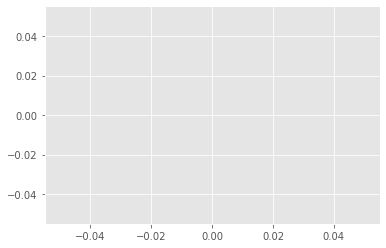

In [28]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,3),H.history["loss"],label="Train Loss")
plt.plot(np.arange(0,3),H.history["val_loss"],label="Validation Loss")
plt.plot(np.arange(0,3),H.history["acc"],label="Accuracy")
plt.plot(np.arange(0,3),H.history["val_acc"],label="Validation Accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()